# UFC prediction

In [335]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [336]:
df = pd.read_csv('data.csv')
b_age = df['B_age']  #we replace B_age to put it among B features
df.drop(['B_age'], axis = 1, inplace = True)
df.insert(76, "B_age", b_age)
df1 = df.copy() #We make a copy of the dataframe for the feature engineering part later
df.head(4)

R_fighter       B_fighter          Referee        date  \
0          Henry Cejudo   Marlon Moraes     Marc Goddard  2019-06-08   
1  Valentina Shevchenko     Jessica Eye  Robert Madrigal  2019-06-08   
2         Tony Ferguson  Donald Cerrone  Dan Miragliotta  2019-06-08   
3         Jimmie Rivera        Petr Yan  Kevin MacDonald  2019-06-08   

                 location Winner  title_bout       weight_class  no_of_rounds  \
0  Chicago, Illinois, USA    Red        True       Bantamweight             5   
1  Chicago, Illinois, USA    Red        True  Women's Flyweight             5   
2  Chicago, Illinois, USA    Red       False        Lightweight             3   
3  Chicago, Illinois, USA   Blue       False       Bantamweight             3   

   B_current_lose_streak  B_current_win_streak  B_draw  B_avg_BODY_att  \
0                    0.0                   4.0     0.0        9.200000   
1                    0.0                   3.0     0.0       14.600000   
2                    0.0                   3.0     0.0       15.354839   
3                    0.0                   4.0     0.0       17.000000   

   B_avg_BODY_landed  B_avg_CLINCH_att  B_avg_CLINCH_landed  \
0           6.000000          0.200000             0.000000   
1           9.100000         11.800000             7.300000   
2          11.322581          6.741935             4.387097   
3          14.000000         13.750000            11.000000   

   B_avg_DISTANCE_att  B_avg_DISTANCE_landed  B_avg_GROUND_att  \
0           62.600000              20.600000          2.600000   
1          124.700000              42.100000          2.400000   
2           84.741935              38.580645          5.516129   
3          109.500000              48.750000         13.000000   

   B_avg_GROUND_landed  B_avg_HEAD_att  B_avg_HEAD_landed  B_avg_KD  \
0             2.000000       48.600000          11.200000  0.800000   
1             1.900000      112.000000          32.000000  0.000000   
2             3.806452       67.645161          23.258065  0.645161   
3            10.500000      116.250000          53.750000  0.500000   

   B_avg_LEG_att  B_avg_LEG_landed  B_avg_PASS  B_avg_REV  B_avg_SIG_STR_att  \
0            7.6          5.400000    0.400000   0.000000              65.40   
1           12.3         10.200000    0.800000   0.000000             138.90   
2           14.0         12.193548    0.935484   0.096774              97.00   
3            3.0          2.500000    0.500000   0.250000             136.25   

   B_avg_SIG_STR_landed  B_avg_SIG_STR_pct  B_avg_SUB_ATT  B_avg_TD_att  \
0             22.600000           0.466000       0.400000       0.80000   
1             51.300000           0.399000       0.700000       1.00000   
2             46.774194           0.496129       0.354839       2.16129   
3             70.250000           0.550000       0.250000       2.50000   

   B_avg_TD_landed  B_avg_TD_pct  B_avg_TOTAL_STR_att  B_avg_TOTAL_STR_landed  \
0         0.200000      0.100000            66.400000               23.600000   
1         0.500000      0.225000           158.700000               69.600000   
2         0.677419      0.295484           103.709677               52.548387   
3         1.250000      0.287500           154.750000               86.750000   

   B_longest_win_streak  B_losses  B_avg_opp_BODY_att  B_avg_opp_BODY_landed  \
0                   4.0       1.0            6.400000               4.000000   
1                   3.0       6.0           13.000000               9.300000   
2                   8.0       8.0           17.903226              11.870968   
3                   4.0       0.0           12.250000               6.000000   

   B_avg_opp_CLINCH_att  B_avg_opp_CLINCH_landed  B_avg_opp_DISTANCE_att  \
0              1.000000                  0.60000               51.200000   
1             12.800000                  9.60000              101.700000   
2              8.419355                  5.83871             

In [337]:
print(df.shape)
len(df[df['Winner'] == 'Draw'])

(5144, 145)


83

In [338]:
for col in df: print(col)

R_fighter
B_fighter
Referee
date
location
Winner
title_bout
weight_class
no_of_rounds
B_current_lose_streak
B_current_win_streak
B_draw
B_avg_BODY_att
B_avg_BODY_landed
B_avg_CLINCH_att
B_avg_CLINCH_landed
B_avg_DISTANCE_att
B_avg_DISTANCE_landed
B_avg_GROUND_att
B_avg_GROUND_landed
B_avg_HEAD_att
B_avg_HEAD_landed
B_avg_KD
B_avg_LEG_att
B_avg_LEG_landed
B_avg_PASS
B_avg_REV
B_avg_SIG_STR_att
B_avg_SIG_STR_landed
B_avg_SIG_STR_pct
B_avg_SUB_ATT
B_avg_TD_att
B_avg_TD_landed
B_avg_TD_pct
B_avg_TOTAL_STR_att
B_avg_TOTAL_STR_landed
B_longest_win_streak
B_losses
B_avg_opp_BODY_att
B_avg_opp_BODY_landed
B_avg_opp_CLINCH_att
B_avg_opp_CLINCH_landed
B_avg_opp_DISTANCE_att
B_avg_opp_DISTANCE_landed
B_avg_opp_GROUND_att
B_avg_opp_GROUND_landed
B_avg_opp_HEAD_att
B_avg_opp_HEAD_landed
B_avg_opp_KD
B_avg_opp_LEG_att
B_avg_opp_LEG_landed
B_avg_opp_PASS
B_avg_opp_REV
B_avg_opp_SIG_STR_att
B_avg_opp_SIG_STR_landed
B_avg_opp_SIG_STR_pct
B_avg_opp_SUB_ATT
B_avg_opp_TD_att
B_avg_opp_TD_landed
B_avg_opp_

The last fight (and ufc event) recorded on this dataset was on the 8th November of 2019.

In [339]:
last_fight = df.loc[0, ['date']]
print(last_fight)

date    2019-06-08
Name: 0, dtype: object


## Data Cleaning

Before April 2001, there were almost no rules in UFC (no judges, no time limits, no rounds, etc.). It's up to this precise date that UFC started to implement a set of rules known as "Unified Rules of Mixed Martial Arts" in accordance with the New Jersey State Athletic Control Board in United States. Therefore we will delete all fights before this major update in UFC's rules history. 

In [340]:
limit_date = '2001-04-01'
df = df[(df['date'] > limit_date)]
print(df.shape)

(4887, 145)


In [341]:
print("Total NaN in dataframe :" , df.isna().sum().sum())
print("Total NaN in each column of the dataframe")
na = []
for index, col in enumerate(df):
    na.append((index, df[col].isna().sum())) 
na_sorted = na.copy()
na_sorted.sort(key = lambda x: x[1], reverse = True) 

for i in range(len(df.columns)):
    print(df.columns[na_sorted[i][0]],":", na_sorted[i][1], "NaN")

Total NaN in dataframe : 83701
Total NaN in each column of the dataframe
B_avg_BODY_att : 1136 NaN
B_avg_BODY_landed : 1136 NaN
B_avg_CLINCH_att : 1136 NaN
B_avg_CLINCH_landed : 1136 NaN
B_avg_DISTANCE_att : 1136 NaN
B_avg_DISTANCE_landed : 1136 NaN
B_avg_GROUND_att : 1136 NaN
B_avg_GROUND_landed : 1136 NaN
B_avg_HEAD_att : 1136 NaN
B_avg_HEAD_landed : 1136 NaN
B_avg_KD : 1136 NaN
B_avg_LEG_att : 1136 NaN
B_avg_LEG_landed : 1136 NaN
B_avg_PASS : 1136 NaN
B_avg_REV : 1136 NaN
B_avg_SIG_STR_att : 1136 NaN
B_avg_SIG_STR_landed : 1136 NaN
B_avg_SIG_STR_pct : 1136 NaN
B_avg_SUB_ATT : 1136 NaN
B_avg_TD_att : 1136 NaN
B_avg_TD_landed : 1136 NaN
B_avg_TD_pct : 1136 NaN
B_avg_TOTAL_STR_att : 1136 NaN
B_avg_TOTAL_STR_landed : 1136 NaN
B_avg_opp_BODY_att : 1136 NaN
B_avg_opp_BODY_landed : 1136 NaN
B_avg_opp_CLINCH_att : 1136 NaN
B_avg_opp_CLINCH_landed : 1136 NaN
B_avg_opp_DISTANCE_att : 1136 NaN
B_avg_opp_DISTANCE_landed : 1136 NaN
B_avg_opp_GROUND_att : 1136 NaN
B_avg_opp_GROUND_landed : 1136 N

Most NaN values can be explained because of empty statistics of new fighters joining UFC and fighting for their first time (they get NaN values until their first fight, so according to how the dataset is built, those statistics are filled in their second fight). 

In [342]:
print('Number of features with NaN values :', len([x[1] for x in na if x[1] > 0]))

Number of features with NaN values : 108


We delete all NaN rows from na_features columns.  
We also delete B_draw and R_draw columns as all those feature's values are fixed to 0 and hence it won't have any impact in our predictive model.  
We delete every match where the result is a draw (equality), indeed we don't want to add an additional class to our target variable. Now we only have a winner and a looser. 

In [343]:
na_features = ['B_Reach_cms', 'B_avg_BODY_att', 'R_avg_BODY_att', 'R_Stance', 'B_Stance', 'R_Reach_cms', 'Referee', 'B_age']
df.dropna(subset = na_features, inplace = True)

df.loc[:,'B_draw'].value_counts() 
df.drop(['B_draw', 'R_draw'], axis = 1, inplace = True)
df = df[df['Winner'] != 'Draw']

In [344]:
print(df.shape)
print("Total NaN in dataframe :" , df.isna().sum().sum())

(3146, 143)
Total NaN in dataframe : 0


## Feature Engineering

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3146 entries, 0 to 4871
Columns: 143 entries, R_fighter to R_age
dtypes: bool(1), float64(132), int64(1), object(9)
memory usage: 3.4+ MB


There are 133 quantitative features and 10 categorical features (by looking at the dataset). 
Let's see which features are categorical features.

In [346]:
list(df.select_dtypes(include=['object', 'bool']))

['R_fighter',
 'B_fighter',
 'Referee',
 'date',
 'location',
 'Winner',
 'title_bout',
 'weight_class',
 'B_Stance',
 'R_Stance']

Let's drop Referee and Location columns as they are kinda useless for our model. We still need to keep date to filter our dataframe and also the rest of the categorical features. 

In [347]:
df.drop(['Referee', 'location'], axis = 1, inplace = True)

In [348]:
df.corr(method = 'pearson').abs()

title_bout  no_of_rounds  B_current_lose_streak  \
title_bout                      1.000000      0.719712               0.134225   
no_of_rounds                    0.719712      1.000000               0.129225   
B_current_lose_streak           0.134225      0.129225               1.000000   
B_current_win_streak            0.326023      0.325665               0.572030   
B_avg_BODY_att                  0.021525      0.039574               0.029570   
B_avg_BODY_landed               0.031606      0.048175               0.051096   
B_avg_CLINCH_att                0.018226      0.012787               0.045783   
B_avg_CLINCH_landed             0.020676      0.015541               0.053459   
B_avg_DISTANCE_att              0.016100      0.042963               0.003162   
B_avg_DISTANCE_landed           0.028798      0.068369               0.032399   
B_avg_GROUND_att                0.097743      0.079264               0.175311   
B_avg_GROUND_landed             0.097573      0.079311               0.175820   
B_avg_HEAD_att                  0.038834      0.056337               0.037309   
B_avg_HEAD_landed               0.070337      0.092885               0.106565   
B_avg_KD                        0.088057      0.132072               0.129132   
B_avg_LEG_att                   0.014572      0.039282               0.027933   
B_avg_LEG_landed                0.010912      0.037983               0.034573   
B_avg_PASS                      0.054752      0.032028               0.172387   
B_avg_REV                       0.045604      0.058060               0.006591   
B_avg_SIG_STR_att               0.037624      0.058419               0.039502   
B_avg_SIG_STR_landed            0.060906      0.088083               0.097661   
B_avg_SIG_STR_pct               0.087792      0.093649               0.150016   
B_avg_SUB_ATT                   0.013210      0.037013               0.063840   
B_avg_TD_att                    0.021369      0.002590               0.069809   
B_avg_TD_landed                 0.065202      0.032844               0.132243   
B_avg_TD_pct                    0.069253      0.038915               0.132384   
B_avg_TOTAL_STR_att             0.054010      0.055114               0.058378   
B_avg_TOTAL_STR_landed          0.077659      0.067867               0.098439   
B_longest_win_streak            0.302717      0.377867               0.147855   
B_losses                        0.034279      0.046011               0.340895   
B_avg_opp_BODY_att              0.041773      0.012338               0.054454   
B_avg_opp_BODY_landed           0.045660      0.016508               0.080128   
B_avg_opp_CLINCH_att            0.023651      0.021103               0.067979   
B_avg_opp_CLINCH_landed         0.028417      0.023889               0.075782   
B_avg_opp_DISTANCE_att          0.022109      0.006075               0.045072   
B_avg_opp_DISTANCE_landed       0.045385      0.013610               0.086828   
B_avg_opp_GROUND_att            0.070041      0.081588               0.193755   
B_avg_opp_GROUND_landed         0.069674      0.075571               0.191448   
B_avg_opp_HEAD_att              0.035483      0.013179               0.092761   
B_avg_opp_HEAD_landed           0.071001      0.049351               0.173433   
B_avg_opp_KD                    0.052534      0.038833               0.170151   
B_avg_opp_LEG_att               0.018619      0.002842               0.043874   
B_avg_opp_LEG_landed            0.029533      0.014306               0.056698   
B_avg_opp_PASS                  0.088151      0.096642               0.151177   
B_avg_opp_REV                   0.009982      0.039946               0.011894   
B_avg_opp_SIG_STR_att           0.038191      0.013169               0.090700   
B_avg_opp_SIG_STR_landed        0.069404      0.042648               0.157349   
B_avg_opp_SIG_STR_pct           0.070985      0.089688               0.164439   
B_avg_opp_SUB_ATT               0.011466      0.044478       

In [349]:
corr_matrix = df.corr(method = 'pearson').abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1)
                 .astype(np.bool))
                 .stack()
                 .sort_values(ascending=False)
      )
print(sol[0:10])

R_avg_opp_HEAD_att      R_avg_opp_SIG_STR_att    0.983463
B_avg_opp_HEAD_att      B_avg_opp_SIG_STR_att    0.981857
B_avg_LEG_att           B_avg_LEG_landed         0.979285
B_avg_opp_LEG_att       B_avg_opp_LEG_landed     0.978640
B_avg_HEAD_att          B_avg_SIG_STR_att        0.978246
R_avg_HEAD_att          R_avg_SIG_STR_att        0.977087
R_avg_LEG_att           R_avg_LEG_landed         0.975959
R_avg_opp_LEG_att       R_avg_opp_LEG_landed     0.972244
R_avg_GROUND_att        R_avg_GROUND_landed      0.971944
R_avg_opp_DISTANCE_att  R_avg_opp_SIG_STR_att    0.970979
dtype: float64


We can notice that variables which are higly correlated between each other are the "attempted" and "landed" ones. Intuitively, the more strikes a fighter attempts, the more strikes are actually landed to his opponent.  
For instance, the higher the average significant head strikes "landed of attempted" for one fighter, the higher the average significant strikes "landed of attempted" he will get.  

Though, we can't only keep "landed" variables because we need to know the accuracy of the fighter (whether on leg kicks, head or body strikes, submission , clinches, etc.). Maybe he attempts a lot of shots but has a hard time touching his opponent.  
We will try to transform some features and hence reduce the number of variables to build a more comprehensive and lighter dataframe later. The goal is to keep main informations while avoiding dependence between features. But first, we are going to use all our dataframe features on the model. 

We can also notice that the number of rounds is highly correlated to the title bout. The rule is that for a title bout, the fights must last 5 rounds maximum and only 3 for a non title bout. But UFC changed rules to allow non title bout fights to last 5 rounds (those on the main cards acctually). 

## Data preparation

As we only need the last fights of UFC fighters to get their last updated statistics and hence feed it into our model, we don't have to keep the previous fights from the active fighters as it will not make any difference in the model's performance.  
In another words, we want to train our model on every fighter's fight at a moment T - 1 where T is the last fight of the fighter. We will then test our model on every fighter's fight at the moment T. We drop fights at moments T-2, T-3, ...

In [350]:
#i = index of the fighter's fight, 0 means the last fight, -1 means first fight
def select_fight_row(df, name, i): 
    df1 = df[(df['R_fighter'] == name) | (df['B_fighter'] == name)]
    df1.reset_index(drop=True, inplace=True) #as we created a new temporary dataframe, we have to reset indexes
    idx = max(df1.index)  #get the index of the oldest fight
    if i > idx:  #if we are looking for a fight that didn't exist, we return an empty array
        return []
    arr = df1.iloc[i,:].values
    return arr

select_fight_row(df, 'Amanda Nunes', 0) #we get the last fight of Amanda Nunes

array(['Cris Cyborg', 'Amanda Nunes', '2018-12-29', 'Blue', True,
       "Women's Featherweight", 5, 0.0, 7.0, 9.7, 6.2, 3.2, 2.1, 58.0,
       28.4, 17.5, 9.9, 52.9, 24.1, 0.2, 16.1, 10.1, 1.4, 0.0, 78.7, 40.4,
       0.5660000000000001, 0.4, 2.6, 1.1, 0.28200000000000003, 90.9, 50.3,
       7.0, 1.0, 5.0, 3.3, 3.6, 2.4, 46.0, 15.3, 6.1, 4.4, 44.4, 14.3,
       0.0, 6.3, 4.5, 0.8, 0.1, 55.7, 22.1, 0.32799999999999996, 0.3, 2.2,
       0.5, 0.212, 68.1, 33.4, 22.0, 533.4, 4.0, 0.0, 1.0, 1.0, 5.0, 2.0,
       0.0, 9.0, 'Orthodox', 172.72, 175.26, 145.0, 30.0, 0.0, 5.0, 22.8,
       18.2, 17.2, 13.4, 81.6, 42.6, 16.4, 11.0, 82.8, 40.0, 0.4, 9.6,
       8.8, 1.0, 0.0, 115.2, 67.0, 0.62, 0.0, 0.8, 0.6, 0.4, 124.6, 75.6,
       5.0, 0.0, 10.0, 5.8, 5.2, 3.8, 65.0, 15.4, 0.8, 0.2, 55.4, 10.4,
       0.0, 5.6, 3.2, 0.2, 0.0, 71.0, 19.4, 0.366, 0.0, 1.8, 0.4, 0.1,
       77.6, 25.2, 12.0, 590.2, 3.0, 0.0, 0.0, 1.0, 4.0, 0.0, 0.0, 5.0,
       'Orthodox', 172.72, 172.72, 145.0, 33.0], dtype=obje

In [351]:
#function to make sure that we don't add the same figther twice in the list
def is_in(liste, name):
    if len(liste) == 0:
        liste = []
        liste.append(name)
    for i in range(len(liste)):
        if name == liste[i]:
            return liste 
    liste.append(name)
    return liste

#get all active UFC fighters (according to the limit_date parameter)
def list_fighters(df, limit_date):
    names = []
    for i, row in df.iterrows():
        if (row['date'] > limit_date):  
            names = is_in(names, row['R_fighter']) 
            names = is_in(names, row['B_fighter']) 
    return names

In [352]:
fighters = list_fighters(df, '2017-01-01')
print(len(fighters))

581


We build a new DataFrame by adding the last fight of every active UFC fighter. 

In [353]:
arr = [select_fight_row(df, fighters[i], 0) for i in range(len(fighters)) if len(select_fight_row(df, fighters[i], 0)) > 0]
cols = [col for col in df] 

last_fights0 = pd.DataFrame(data = arr, columns = cols)
last_fights0.drop_duplicates(inplace = True)
last_fights0.head(4)

R_fighter       B_fighter        date Winner  title_bout  \
0          Henry Cejudo   Marlon Moraes  2019-06-08    Red        True   
2  Valentina Shevchenko     Jessica Eye  2019-06-08    Red        True   
4         Tony Ferguson  Donald Cerrone  2019-06-08    Red       False   
6         Jimmie Rivera        Petr Yan  2019-06-08   Blue       False   

        weight_class  no_of_rounds  B_current_lose_streak  \
0       Bantamweight             5                    0.0   
2  Women's Flyweight             5                    0.0   
4        Lightweight             3                    0.0   
6       Bantamweight             3                    0.0   

   B_current_win_streak  B_avg_BODY_att  B_avg_BODY_landed  B_avg_CLINCH_att  \
0                   4.0        9.200000           6.000000          0.200000   
2                   3.0       14.600000           9.100000         11.800000   
4                   3.0       15.354839          11.322581          6.741935   
6                   4.0       17.000000          14.000000         13.750000   

   B_avg_CLINCH_landed  B_avg_DISTANCE_att  B_avg_DISTANCE_landed  \
0             0.000000           62.600000              20.600000   
2             7.300000          124.700000              42.100000   
4             4.387097           84.741935              38.580645   
6            11.000000          109.500000              48.750000   

   B_avg_GROUND_att  B_avg_GROUND_landed  B_avg_HEAD_att  B_avg_HEAD_landed  \
0          2.600000             2.000000       48.600000          11.200000   
2          2.400000             1.900000      112.000000          32.000000   
4          5.516129             3.806452       67.645161          23.258065   
6         13.000000            10.500000      116.250000          53.750000   

   B_avg_KD  B_avg_LEG_att  B_avg_LEG_landed  B_avg_PASS  B_avg_REV  \
0  0.800000            7.6          5.400000    0.400000   0.000000   
2  0.000000           12.3         10.200000    0.800000   0.000000   
4  0.645161           14.0         12.193548    0.935484   0.096774   
6  0.500000            3.0          2.500000    0.500000   0.250000   

   B_avg_SIG_STR_att  B_avg_SIG_STR_landed  B_avg_SIG_STR_pct  B_avg_SUB_ATT  \
0              65.40             22.600000           0.466000       0.400000   
2             138.90             51.300000           0.399000       0.700000   
4              97.00             46.774194           0.496129       0.354839   
6             136.25             70.250000           0.550000       0.250000   

   B_avg_TD_att  B_avg_TD_landed  B_avg_TD_pct  B_avg_TOTAL_STR_att  \
0       0.80000         0.200000      0.100000            66.400000   
2       1.00000         0.500000      0.225000           158.700000   
4       2.16129         0.677419      0.295484           103.709677   
6       2.50000         1.250000      0.287500           154.750000   

   B_avg_TOTAL_STR_landed  B_longest_win_streak  B_losses  B_avg_opp_BODY_att  \
0               23.600000                   4.0       1.0            6.400000   
2               69.600000                   3.0       6.0           13.000000   
4               52.548387                   8.0       8.0           17.903226   
6               86.750000                   4.0       0.0           12.250000   

   B_avg_opp_BODY_landed  B_avg_opp_CLINCH_att  B_avg_opp_CLINCH_landed  \
0               4.000000              1.000000                  0.60000   
2               9.300000             12.800000                  9.60000   
4              11.870968              8.419355                  5.83871   
6               6.000000              6.000000                  3.75000   

   B_avg_opp_DISTANCE_att  B_avg_opp_DISTANCE_landed  B_avg_opp_GROUND_att  \
0               51.200000                  17.400000              0.600000   
2              101.700000                  32.000000              8.100000   
4               84.548387                  38.064516             

We build another Dataframe by adding the second last fight of every active UFC fighter.

In [354]:
arr = [select_fight_row(df, fighters[i], 1) for i in range(len(fighters)) if len(select_fight_row(df, fighters[i], 1)) > 0]
last_fights1 = pd.DataFrame(data = arr, columns = cols)
last_fights1.drop_duplicates(inplace = True)
last_fights1.head(4)

R_fighter           B_fighter        date Winner  title_bout  \
0          Henry Cejudo        TJ Dillashaw  2019-01-19    Red        True   
1      Raphael Assuncao       Marlon Moraes  2019-02-02   Blue       False   
2  Valentina Shevchenko  Joanna Jedrzejczyk  2018-12-08    Red        True   
3     Katlyn Chookagian         Jessica Eye  2018-12-08   Blue       False   

        weight_class  no_of_rounds  B_current_lose_streak  \
0          Flyweight             5                    0.0   
1       Bantamweight             5                    0.0   
2  Women's Flyweight             5                    0.0   
3  Women's Flyweight             3                    0.0   

   B_current_win_streak  B_avg_BODY_att  B_avg_BODY_landed  B_avg_CLINCH_att  \
0                   4.0       14.733333          10.066667         10.533333   
1                   3.0       11.000000           7.500000          0.250000   
2                   1.0       37.363636          26.909091         29.090909   
3                   2.0       11.555556           7.444444         11.333333   

   B_avg_CLINCH_landed  B_avg_DISTANCE_att  B_avg_DISTANCE_landed  \
0             7.000000          135.266667              47.533333   
1             0.000000           73.750000              24.000000   
2            20.090909          209.636364              93.636364   
3             6.888889          119.222222              39.000000   

   B_avg_GROUND_att  B_avg_GROUND_landed  B_avg_HEAD_att  B_avg_HEAD_landed  \
0         16.533333            12.400000      133.066667          45.733333   
1          2.000000             1.750000       56.500000          12.000000   
2          2.090909             1.454545      167.272727          57.727273   
3          2.666667             2.111111      110.333333          31.222222   

   B_avg_KD  B_avg_LEG_att  B_avg_LEG_landed  B_avg_PASS  B_avg_REV  \
0  0.600000      14.533333         11.133333    1.866667        0.0   
1  0.750000       8.500000          6.250000    0.000000        0.0   
2  0.090909      36.181818         30.545455    0.000000        0.0   
3  0.000000      11.333333          9.333333    0.888889        0.0   

   B_avg_SIG_STR_att  B_avg_SIG_STR_landed  B_avg_SIG_STR_pct  B_avg_SUB_ATT  \
0         162.333333             66.933333           0.409333       0.800000   
1          76.000000             25.750000           0.475000       0.250000   
2         240.818182            115.181818           0.425455       0.000000   
3         133.222222             48.000000           0.396667       0.777778   

   B_avg_TD_att  B_avg_TD_landed  B_avg_TD_pct  B_avg_TOTAL_STR_att  \
0      3.733333         1.400000      0.318667               188.60   
1      1.000000         0.250000      0.125000                76.75   
2      0.272727         0.181818      0.136364               254.00   
3      0.777778         0.555556      0.250000               155.00   

   B_avg_TOTAL_STR_landed  B_longest_win_streak  B_losses  B_avg_opp_BODY_att  \
0               89.333333                   4.0       3.0           13.733333   
1               26.500000                   3.0       1.0            8.000000   
2              127.000000                   8.0       2.0           14.363636   
3               68.111111                   2.0       6.0           12.777778   

   B_avg_opp_BODY_landed  B_avg_opp_CLINCH_att  B_avg_opp_CLINCH_landed  \
0               7.200000              6.000000                 3.200000   
1               5.000000              1.250000                 0.750000   
2               8.000000             11.545455                 6.909091   
3               9.333333             13.222222                 9.777778   

   B_avg_opp_DISTANCE_att  B_avg_opp_DISTANCE_landed  B_avg_opp_GROUND_att  \
0              100.666667                  32.466667              1.400000   
1               61.000000                  21.250000              0.750000   
2              128.818182                  38

In [355]:
print(last_fights0.shape)
print(last_fights1.shape)

(413, 141)
(404, 141)


## Data preprocessing
  
Let's create a pipeline to make transformation on each categorical feature.  
We will rather use ordinal/label encoder than one-hot-encoder as it leads to a poorer accuracy on Random Forest model when dummie features get high. Here is a good explanation why : https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769.  
Furthermore, we will be able to interpret feature importances easily. 

In [356]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer

#If the winner is from the Red corner, Winner value will be encoded as 1, otherwise it will be 0 (Blue corner)
preprocess = make_column_transformer(
    (OrdinalEncoder(), ['Winner', 'title_bout', 'weight_class', 'B_Stance', 'R_Stance']),  
    remainder='passthrough'
)

last_fights0_preprocess = preprocess.fit_transform(last_fights0)
last_fights1_preprocess = preprocess.transform(last_fights1) 

In [357]:
last_fights0_preprocess[0,:]

array([1.0, 1.0, 0.0, 0.0, 0.0, 'Henry Cejudo', 'Marlon Moraes',
       '2019-06-08', 5, 0.0, 4.0, 9.2, 6.0, 0.2, 0.0, 62.6, 20.6, 2.6,
       2.0, 48.6, 11.2, 0.8, 7.6, 5.4, 0.4, 0.0, 65.4, 22.6, 0.466, 0.4,
       0.8, 0.2, 0.1, 66.4, 23.6, 4.0, 1.0, 6.4, 4.0, 1.0, 0.6, 51.2,
       17.4, 0.6, 0.2, 39.6, 9.4, 0.2, 6.8, 4.8, 0.0, 0.0, 52.8, 18.2,
       0.23600000000000002, 0.0, 1.0, 0.4, 0.1, 53.8, 19.2, 9.0, 419.4,
       0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 4.0, 167.64, 170.18, 135.0,
       31.0, 0.0, 4.0, 21.9, 16.4, 17.0, 11.0, 75.0, 26.5, 9.4, 6.5, 74.2,
       23.9, 0.4, 5.3, 3.7, 1.2, 0.0, 101.4, 44.0, 0.466, 0.1, 5.3, 1.9,
       0.45799999999999996, 129.9, 69.1, 4.0, 2.0, 13.3, 8.8, 7.5, 5.1,
       90.5, 26.8, 0.8, 0.3, 76.1, 17.3, 0.1, 9.4, 6.1, 0.0, 0.0, 98.8,
       32.2, 0.336, 0.0, 0.9, 0.1, 0.05, 110.5, 43.3, 27.0, 742.6, 3.0,
       0.0, 2.0, 4.0, 2.0, 0.0, 0.0, 8.0, 162.56, 162.56, 135.0, 32.0],
      dtype=object)

In [358]:
last_fights0_preprocess = np.delete(last_fights0_preprocess, [5,6,7], axis = 1) #We remove names and date columns
last_fights1_preprocess = np.delete(last_fights1_preprocess, [5,6,7], axis = 1)

In [359]:
last_fights0_preprocess[0,:]

array([1.0, 1.0, 0.0, 0.0, 0.0, 5, 0.0, 4.0, 9.2, 6.0, 0.2, 0.0, 62.6,
       20.6, 2.6, 2.0, 48.6, 11.2, 0.8, 7.6, 5.4, 0.4, 0.0, 65.4, 22.6,
       0.466, 0.4, 0.8, 0.2, 0.1, 66.4, 23.6, 4.0, 1.0, 6.4, 4.0, 1.0,
       0.6, 51.2, 17.4, 0.6, 0.2, 39.6, 9.4, 0.2, 6.8, 4.8, 0.0, 0.0,
       52.8, 18.2, 0.23600000000000002, 0.0, 1.0, 0.4, 0.1, 53.8, 19.2,
       9.0, 419.4, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 4.0, 167.64, 170.18,
       135.0, 31.0, 0.0, 4.0, 21.9, 16.4, 17.0, 11.0, 75.0, 26.5, 9.4,
       6.5, 74.2, 23.9, 0.4, 5.3, 3.7, 1.2, 0.0, 101.4, 44.0, 0.466, 0.1,
       5.3, 1.9, 0.45799999999999996, 129.9, 69.1, 4.0, 2.0, 13.3, 8.8,
       7.5, 5.1, 90.5, 26.8, 0.8, 0.3, 76.1, 17.3, 0.1, 9.4, 6.1, 0.0,
       0.0, 98.8, 32.2, 0.336, 0.0, 0.9, 0.1, 0.05, 110.5, 43.3, 27.0,
       742.6, 3.0, 0.0, 2.0, 4.0, 2.0, 0.0, 0.0, 8.0, 162.56, 162.56,
       135.0, 32.0], dtype=object)

In [360]:
X_train, y_train = last_fights1_preprocess[:,1:], last_fights1_preprocess[:,0]
X_test, y_test = last_fights0_preprocess[:,1:], last_fights0_preprocess[:,0]
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [361]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 137)
(404,)
(413, 137)
(413,)


## Random Forest Model

Random Forest is a tree-based model and hence does not require feature scaling. Those algorithm computations aren't based on distance (euclidian distance or whatever), therefore, normalizing data is useless.

In [362]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Random Forest composed of 500 decision trees. We optimized parameters using cross-validation and GridSearch tool paired together
classifier = RandomForestClassifier(n_estimators = 500, 
                                    criterion = 'entropy', 
                                    max_depth = 20, 
                                    min_samples_split = 2,
                                    min_samples_leaf = 3, 
                                    random_state = 0
                                   )
classifier.fit(X_train, y_train)

#We use cross-validation with 10-folds to have a more precise accuracy (reduce variation)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print('Accuracy mean : ', accuracies.mean())
print('Accuracy standard deviation : ', accuracies.std())

#print('Training accuracy : ', classifier.score(X_train, y_train))
y_pred = classifier.predict(X_test)
print('Testing accuracy : ', accuracy_score(y_test, y_pred), '\n')

target_names = ["Blue","Red"]
print(classification_report(y_test, y_pred, labels = [0, 1], target_names = target_names))

Accuracy mean :  0.6439024390243903
Accuracy standard deviation :  0.06070364776220331
Testing accuracy :  0.6585956416464891 

              precision    recall  f1-score   support

        Blue       0.72      0.50      0.59       204
         Red       0.63      0.81      0.71       209

   micro avg       0.66      0.66      0.66       413
   macro avg       0.67      0.66      0.65       413
weighted avg       0.67      0.66      0.65       413



We get an accuracy of 0.66 so as average f1-score which is pretty good for such an uncertain sport as MMA.

In [ ]:
#from sklearn.model_selection import GridSearchCV
#parameters = [{'n_estimators': [10, 50, 100, 500, 1000],
#               'criterion': ['gini', 'entropy'],
#               'max_depth': [5, 10, 50],
#               'min_samples_split': [2, 3, 4],
#               'min_samples_leaf': [1, 2, 3],
#              }]

#grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
#grid_search = grid_search.fit(X_train, y_train)
#best_accuracy = grid_search.best_score_

#best_params = grid_search.best_params_
#print('Best accuracy : ', best_accuracy)
#print('Best parameters : ', best_params)

Remind that Blue => 0 and Red => 1 for the target value (Winner).

[Text(0, 0.5, 'Blue'), Text(0, 1.5, 'Red')]

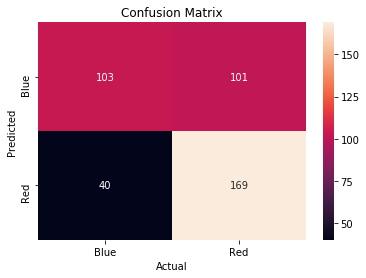

In [363]:
from sklearn.metrics import confusion_matrix

#The confusion matrix is like that:
#[TN FP
# FN TP]
cm = confusion_matrix(y_test, y_pred) 
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = "d")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Blue', 'Red'])
ax.yaxis.set_ticklabels(['Blue', 'Red'])

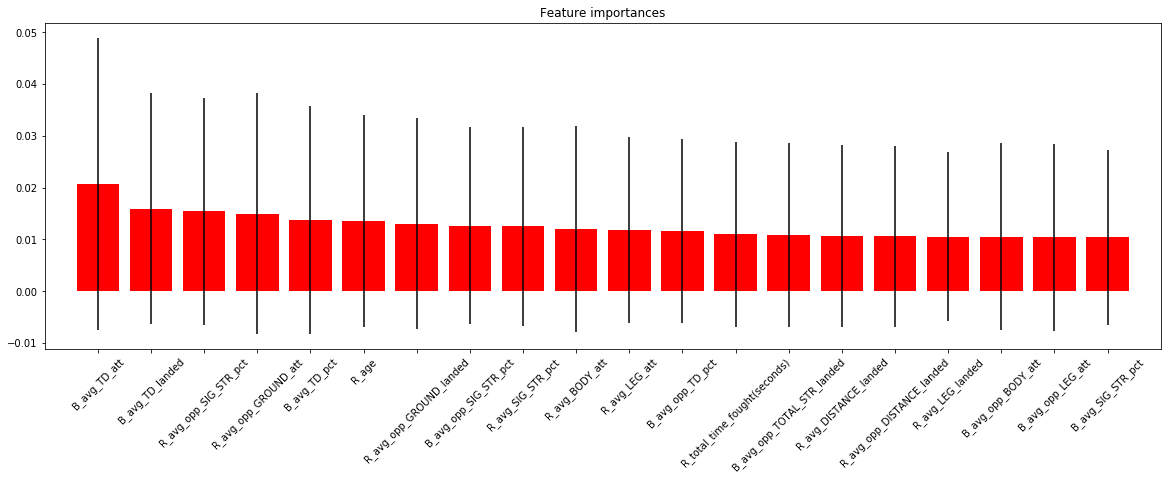

In [364]:
feature_importances = classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]
n = 20 #maximum feature importances displayed
feature_names = [name for name in cols if name not in ["R_fighter", "B_fighter", "date", "Winner","R_Stance", "B_Stance"]]
feature_names.insert(2, "B_Stance") 
feature_names.insert(3, "R_Stance")
idx = indices[0:n] 
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)

#for f in range(n):
#    print("%d. feature %s (%f)" % (f + 1, feature_names[idx[f]], feature_importances[idx[f]])) 

plt.figure(figsize=(20, 6))
plt.title("Feature importances")
plt.bar(range(n), feature_importances[idx], color="r", yerr=std[idx], align="center")
plt.xticks(range(n), [feature_names[id] for id in idx], rotation = 45) 
plt.xlim([-1, n]) 
plt.show()

There are no big significant features that could explain by themselves the model results. Almost all variables have an impact on the model even if it's on a very small proportion.  
But we can notice that takedowns attempts, significant strikes that opponents are doing on fighters and age play a slightly bigger role which makes sense.  


Let's visualize now the construction of a single Decision Tree among the Forest. 

In [365]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

tree_estimator = classifier.estimators_[10]
export_graphviz(tree_estimator, 
                out_file='tree.dot', 
                filled=True, 
                rounded=True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')

No tree has a higher max_depth than 20. The main features used to split the tree at each step are often the ones represented in the feature importances plot earlier. 

## Predictions

Let's make predictions on the next UFC event introducing one waited fight on the main card between Kamaru Usman and Colby Covington (event occuring the 15/12/2019, UFC 245).

In [366]:
def predict(df, preprocess, classifier, blue_fighter, red_fighter, weightclass, rounds, title_bout = False): 
    #We build two dataframes, one for each figther 
    f1 = df[(df['R_fighter'] == blue_fighter) | (df['B_fighter'] == blue_fighter)]
    f1.reset_index(drop=True, inplace=True)
    f1 = f1[:1]
    f2 = df[(df['R_fighter'] == red_fighter) | (df['B_fighter'] == red_fighter)] 
    f2.reset_index(drop=True, inplace=True)
    f2 = f2[:1]
    #if the fighter was red/blue corner on his last fight, we filter columns to only keep his statistics (and not the other fighter)
    #then we rename columns according to the color of  the corner in the parameters using re.sub()
    if (f1.loc[0, ['R_fighter']].values[0]) == blue_fighter:
        result1 = f1.filter(regex='^R', axis=1) #here we keep the red corner stats
        result1.rename(columns = lambda x: re.sub('[R]','B', x), inplace=True)  #we rename it with "B_" prefix because he's in the blue_corner
    else: 
        result1 = f1.filter(regex='^B', axis=1)
    if (f2.loc[0, ['R_fighter']].values[0]) == red_fighter:
        result2 = f2.filter(regex='^R', axis=1)
    else:
        result2 = f2.filter(regex='^B', axis=1)
        result2.rename(columns = lambda x: re.sub('[B]','R', x), inplace=True)
    result = pd.concat([result1, result2], axis = 1) #we concatenate the red and blue fighter dataframes (in columns)
    #We must prepare the data as we did when we trained our model because we use the same pipeline object (preprocess)
    result.drop(['R_fighter','B_fighter'], axis = 1, inplace = True) 
    result.insert(0, 'R_fighter', red_fighter) 
    result.insert(1, 'B_fighter', blue_fighter) 
    result.insert(2, 'date', '2019') #this value is random, the column will be removed anyway but we need it for the preprocess step 
    result.insert(3, 'Winner', 'Red') #same here
    result.insert(4, 'title_bout', title_bout) 
    result.insert(5, 'weight_class', weightclass)
    result.insert(6, 'no_of_rounds', rounds)
    preprocess_result = preprocess.transform(result)
    fights = np.delete(preprocess_result, [5,6,7], axis = 1)[:,1:] #we remove fighter names, date and winner
    pred = classifier.predict(fights)
    proba = classifier.predict_proba(fights)
    if (pred == 1.0): 
        print("The predicted winner is", red_fighter, 'with a probability of', round(proba[0][1] * 100, 2), "%")
    else:
        print("The predicted winner is", blue_fighter, 'with a probability of ', round(proba[0][0] * 100, 2), "%")
    return proba

In [367]:
predict(df, preprocess, classifier, 'Kamaru Usman', 'Colby Covington', 'Welterweight', 5, True) 

The predicted winner is Kamaru Usman with a probability of  62.39 %


C:\Users\Charl\Mes logiciels\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


array([[0.6238912, 0.3761088]])

In [368]:
predict(df, preprocess, classifier, 'Max Holloway', 'Alexander Volkanovski', 'Featherweight', 5, True) 

C:\Users\Charl\Mes logiciels\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


The predicted winner is Alexander Volkanovski with a probability of 71.36 %


array([[0.28641111, 0.71358889]])

In [369]:
predict(df, preprocess, classifier, 'Amanda Nunes', 'Germaine de Randamie', "Women's Bantamweight", 5, True)

The predicted winner is Amanda Nunes with a probability of  51.57 %


C:\Users\Charl\Mes logiciels\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


array([[0.51570159, 0.48429841]])

In [370]:
predict(df, preprocess, classifier, 'Jose Aldo', 'Marlon Moraes', 'Bantamweight', 3, False)

C:\Users\Charl\Mes logiciels\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


The predicted winner is Marlon Moraes with a probability of 66.31 %


array([[0.33691667, 0.66308333]])

In [371]:
predict(df, preprocess, classifier, 'Urijah Faber', 'Petr Yan', 'Bantamweight', 3, False)

C:\Users\Charl\Mes logiciels\Anaconda\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


The predicted winner is Petr Yan with a probability of 69.81 %


array([[0.30193095, 0.69806905]])

After testing our Random Forest model on almost all features on our first dataframe, we are going to apply some logical transformations on features that make sense like only keeping the ratio (accuracy) between attempts and landed shots for instance. We'll also drop some extra features like the winning's types which don't bring a lot of information to our model. The purpose is to see how well those changes are improving our model's performance (if it's significant or not). 

In [372]:
features = ['avg_BODY', 'avg_CLINCH', 'avg_DISTANCE', 'avg_GROUND', 'avg_HEAD', 'avg_LEG', 'avg_SIG_STR', 'avg_TD', 'avg_TOTAL_STR', 'avg_opp_BODY', 'avg_opp_CLINCH', 'avg_opp_DISTANCE', 'avg_opp_GROUND', 'avg_opp_HEAD', 'avg_opp_LEG', 'avg_opp_SIG_STR', 'avg_opp_TD', 'avg_opp_TOTAL_STR']

for i in range(len(features)):
    feature_att = 'B_' + features[i] + '_att'
    feature_landed = 'B_' + features[i] + '_landed'
    feature_acc_name = 'B_' + features[i] + '_acc'
    feature_acc = df1[feature_landed] / df1[feature_att]
    df1.drop([feature_landed, feature_att], axis = 1, inplace = True)
    df1.insert(12 + i, feature_acc_name, feature_acc)
    
for i in range(len(features)):
    feature_att = 'R_' + features[i] + '_att'
    feature_landed = 'R_' + features[i] + '_landed'
    feature_acc_name = 'R_' + features[i] + '_acc'
    feature_acc = df1[feature_landed] / df1[feature_att]
    df1.drop([feature_landed, feature_att], axis = 1, inplace = True)
    df1.insert(62 + i, feature_acc_name, feature_acc)

#Let's drop the percentage variables that are no longer needed and the type of wins (decision, submision, TKO, etc.)
for feat in df1:
    if ("pct") in feat:
        df1.drop([feat], axis = 1, inplace = True)
    if ("by") in feat: 
        df1.drop([feat], axis = 1, inplace = True)

print(df1.shape)

(5144, 89)


We reduced features number from 145 to 89. 

In [373]:
df1 = df1[(df1['date'] > limit_date)]
cols = df1.columns
df1.dropna(subset = cols, inplace = True)
df1.loc[:,'B_draw'].value_counts() 
df1.drop(['B_draw', 'R_draw'], axis = 1, inplace = True)
df1 = df1[df1['Winner'] != 'Draw']
print(df1.shape)
print("Total NaN in dataframe :" , df1.isna().sum().sum())

(1913, 87)
Total NaN in dataframe : 0


In [374]:
df1.drop(['Referee', 'location'], axis = 1, inplace = True)
fighters = list_fighters(df1, '2017-01-01')
print(len(fighters))

418


In [375]:
arr = [select_fight_row(df1, fighters[i], 0) for i in range(len(fighters)) if len(select_fight_row(df1, fighters[i], 0)) > 0]
cols = [col for col in df1] 
last_fights0 = pd.DataFrame(data = arr, columns = cols)
last_fights0.drop_duplicates(inplace = True)
last_fights0.head(4)
arr = [select_fight_row(df1, fighters[i], 1) for i in range(len(fighters)) if len(select_fight_row(df1, fighters[i], 1)) > 0]
last_fights1 = pd.DataFrame(data = arr, columns = cols)
last_fights1.drop_duplicates(inplace = True)
last_fights1.head(4)
last_fights0_preprocess = preprocess.fit_transform(last_fights0)
last_fights1_preprocess = preprocess.transform(last_fights1) 
last_fights0_preprocess = np.delete(last_fights0_preprocess, [5,6,7], axis = 1) 
last_fights1_preprocess = np.delete(last_fights1_preprocess, [5,6,7], axis = 1)
X_train1, y_train1 = last_fights1_preprocess[:,1:], last_fights1_preprocess[:,0]
X_test1, y_test1 = last_fights0_preprocess[:,1:], last_fights0_preprocess[:,0]
y_train1 = y_train1.astype('int')
y_test1 = y_test1.astype('int')
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(289, 81)
(289,)
(298, 81)
(298,)


In [376]:
classifier1 = RandomForestClassifier(n_estimators = 500, 
                                    criterion = 'entropy', 
                                    max_depth = 10, 
                                    min_samples_split = 2,
                                    min_samples_leaf = 2, 
                                    random_state = 0
                                   )
classifier1.fit(X_train1, y_train1)

accuracies = cross_val_score(estimator = classifier1, X = X_train1, y = y_train1, cv = 5)
print('Accuracy mean : ', accuracies.mean())
print('Accuracy standard deviation : ', accuracies.std())

y_pred1 = classifier1.predict(X_test1)
print('Testing accuracy : ', accuracy_score(y_test1, y_pred1), '\n')

target_names = ["Blue","Red"]
print(classification_report(y_test1, y_pred1, labels = [0, 1], target_names = target_names))

Accuracy mean :  0.588567268551273
Accuracy standard deviation :  0.04430398946796046
Testing accuracy :  0.6577181208053692 

              precision    recall  f1-score   support

        Blue       0.76      0.49      0.60       153
         Red       0.61      0.83      0.70       145

   micro avg       0.66      0.66      0.66       298
   macro avg       0.68      0.66      0.65       298
weighted avg       0.68      0.66      0.65       298



[Text(0, 0.5, 'Blue'), Text(0, 1.5, 'Red')]

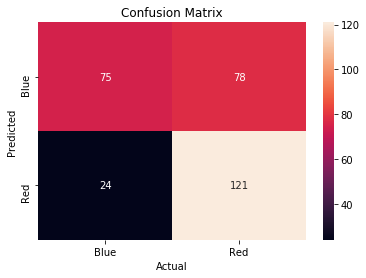

In [377]:
cm = confusion_matrix(y_test1, y_pred1) 
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt = "d")
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['Blue', 'Red'])
ax.yaxis.set_ticklabels(['Blue', 'Red'])

We get a final accuracy of around 0.66 on the test set which is quite similar to the model containing all variables even if general training accuracy is smaller (0.58). Maybe the reason is because the model trained on a dataset too small as the number of NaN values were higher on this one due to feature transformation . Anyway, it still performs well on test set. 